Nama : Elisabeth Faren Widyaningtyas

NIM : 4101422103

Sumber data : https://www.kaggle.com/datasets/l3llff/banana/code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import pandas as pd

data = pd.read_csv('banana_quality.csv')

In [3]:
data.head()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good

In [4]:
data.tail()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  
7995  2.398091     Bad  
7996  2.113136     Bad  
7997  0.697361     Bad  
7998  0.423569     Bad  
7999  1.435644     Bad

Dataset kualitas buah pisang ini memiliki total pengamatan sebanyak 8000. Setiap baris dalam dataset mewakili satu pisang, dan kolom-kolomnya adalah atribut-atribut yang diamati pada pisang-pisang tersebut. Berikut adalah penjelasan dari setiap variabelnya:
*   Size : Ukuran pisang
*   Wight : Berat pisang
*   Sweetness : Tingkat kemanisan pisang
*   Softness : Tingkat kelembutan pisang
*   HarvestTime : Waktu untuk panen
*   Ripeness : Tingkat kematangan pisang
*   Acidity : Kesamaan pisang
*   Quality : Variabel target atau label yang menunjukkan apakah pisang baik atau buruk. Label bernilai 1 untuk pisang yang baik dan 0 untuk pisang yang buruk.

Dataset ini memberikan informasi penting tentang karakteristik fisik buah pisang dan dapat digunakan untuk memprediksi atau menganalisis faktor-faktor yang mempengaruhi kualitas pisang pada berbagai tahap kematangan.

In [5]:
data.describe()

Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.277651    -2.223574    -2.107329    -1.590458    -2.120659   
50%      -0.897514    -0.868659    -1.020673     0.202644    -0.934192   
75%       0.654216     0.775491     0.311048     1.547120     0.507326   
max       7.970800     5.679692     7.539374     8.241555     6.293280   

          Ripeness      Acidity  
count  8000.000000  8000.000000  
mean      0.781098     0.008725  
std       2.114289     2.293467  
min      -7.423155    -8.226977  
25%      -0.574226    -1.629450  
50%       0.964952     0.098735  
75%       2.261650     1.682063  
max       7.249034     7.411633

Sebelum dilakukan pemodelan, data perlu melalui tahap preprocessing guna memastikan kualitas dan kelayakan data untuk dianalisis. Proses ini bertujuan untuk meningkatkan keakuratan model dan menghindari bias yang mungkin terjadi akibat data yang belum bersih.

# **Preprocessing Data**

### **Cek Missing Value**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 8 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 8000 baris. Semua kolom memiliki jumlah baris sebanyak 8000, maka tidak ada baris yang hilang (missing rows).

Untuk mempertegas bahwa tidak ada nilai yang hilang (Missing Value) di setiap kolom, dapat diperiksa sebagai berikut:

In [7]:
data.isnull()

Size  Weight  Sweetness  Softness  HarvestTime  Ripeness  Acidity  \
0     False   False      False     False        False     False    False   
1     False   False      False     False        False     False    False   
2     False   False      False     False        False     False    False   
3     False   False      False     False        False     False    False   
4     False   False      False     False        False     False    False   
...     ...     ...        ...       ...          ...       ...      ...   
7995  False   False      False     False        False     False    False   
7996  False   False      False     False        False     False    False   
7997  False   False      False     False        False     False    False   
7998  False   False      False     False        False     False    False   
7999  False   False      False     False        False     False    False   

      Quality  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
7995    False  
7996    False  
7997    False  
7998    False  
7999    False  

[8000 rows x 8 columns]

In [8]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
data.isnull().sum().sum()

np.int64(0)

Berdasarkan output diatas menunjukkan semua kolom bernilai 0 (tidak ada missing values), maka dapat disimpulkan bahwa dataset lengkap, tidak terdapat nilai yang hilang (missing values) pada kedelapan kolom yang tersedia, masing-masing terdiri dari 8000 baris data.

### **Cek dan Penanganan Outlier**

**Cek Oulier**

Sebelum masuk ke tahap pemodelan, penting untuk memeriksa apakah terdapat nilai pencilan (outlier) dalam dataset. Outlier dapat memengaruhi akurasi model, terutama pada algoritma seperti Naive Bayes dan K-Nearest Neighbors. Oleh karena itu, deteksi dan penanganan outlier dilakukan sebagai bagian dari proses pembersihan data agar model yang dibangun lebih optimal.
Cek Outlier dengan menggunakan beberapa metode:

1. Boxplot

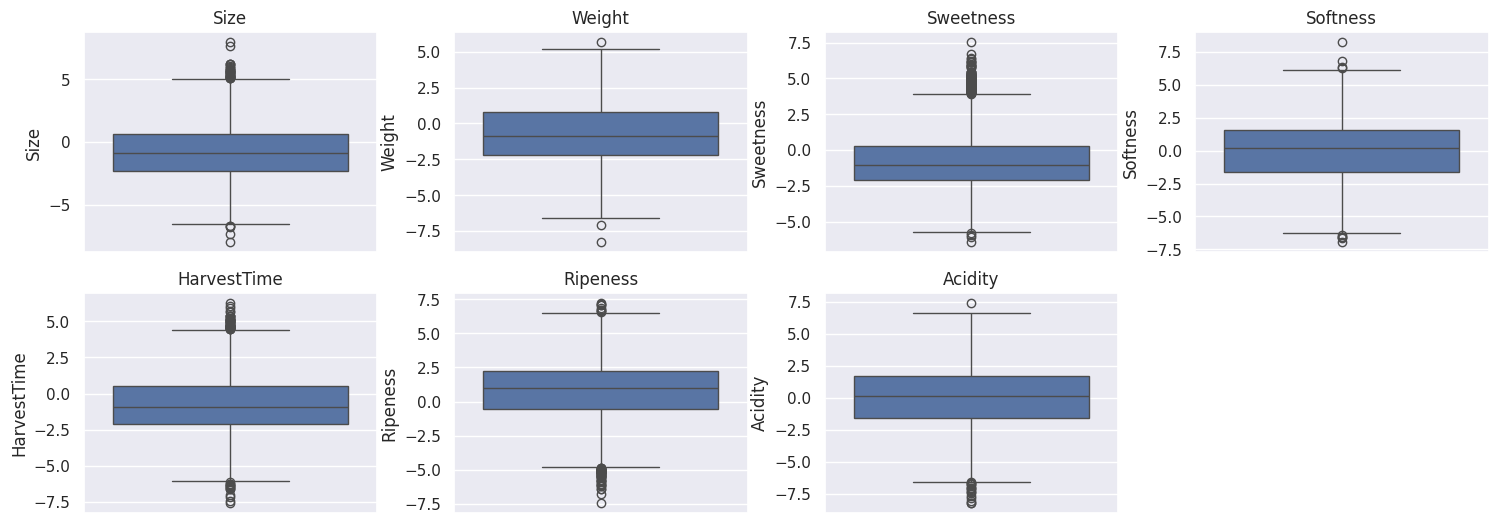

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Size', 'Weight', 'Sweetness', 'Softness',
            'HarvestTime', 'Ripeness',
            'Acidity']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [11]:
def detect_outliers_iqr(data, column):
    if pd.api.types.is_numeric_dtype(data[column]):
        Q1 = data[column].quantile(0.25)  # Kuartil 1
        Q3 = data[column].quantile(0.75)  # Kuartil 3
        IQR = Q3 - Q1  # Rentang interkuartil
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    else:
        return pd.DataFrame()

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    if not outliers.empty:
        print(f"{col}: {len(outliers)} outliers")

Size: 36 outliers
Weight: 3 outliers
Sweetness: 178 outliers
Softness: 9 outliers
HarvestTime: 58 outliers
Ripeness: 58 outliers
Acidity: 17 outliers


Berdasarkan output Boxplot dan IQR, terdapat outliers Size (36 outlier), Weight (3 outliers), Sweetness (178 outlier), HarvestTime (58 outlier), Ripeness (58 outlier), dan Acidity (17 outlier). Kemudian, dilakukan penanganan terhadap outlier dengan menggunakan Winsorizing (Mengganti Outlier dengan Batas IQR).

**Penanganan Outlier**

In [12]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

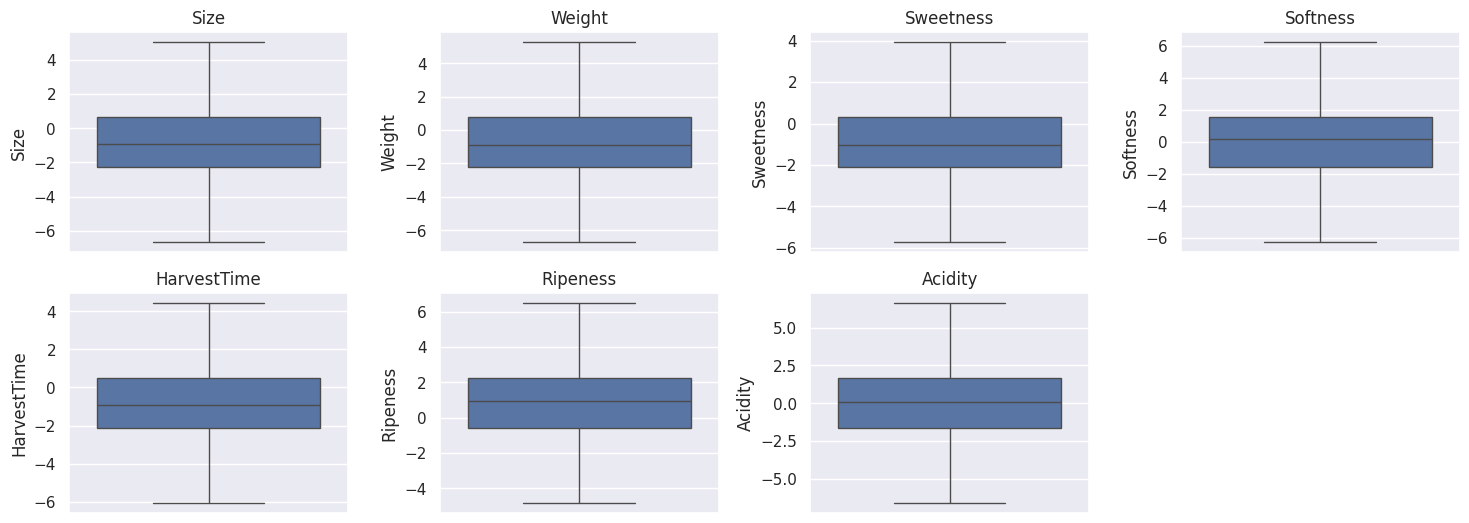

In [13]:
#Cek boxplot kembali
num_cols = ['Size', 'Weight', 'Sweetness', 'Softness',
            'HarvestTime', 'Ripeness',
            'Acidity']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
#IQR kembali
def detect_outliers_iqr(data, column):
    if pd.api.types.is_numeric_dtype(data[column]):
        Q1 = data[column].quantile(0.25)  # Kuartil 1
        Q3 = data[column].quantile(0.75)  # Kuartil 3
        IQR = Q3 - Q1  # Rentang interkuartil
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    else:
        return pd.DataFrame()

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    if not outliers.empty:
        print(f"{col}: {len(outliers)} outliers")

Berdasarkan output boxplot, tidak terlihat adanya nilai pencilan (outlier) pada data. Selain itu, ketika dilakukan deteksi outlier menggunakan metode IQR, tidak ditemukan baris yang memenuhi kriteria sebagai outlier. Demikian dapat disimpulkan bahwa dataset ini bersih dari outlier.

### **Encoding Data Kategorik**

Dalam dataset terdapat data kategorik yakni kolom "Quality", jadi dilakukan encoding agar data dapat digunakan.

In [15]:
#Melihat isi dalam kolom Quality
data['Quality'].unique()

array(['Good', 'Bad'], dtype=object)

Karena jumlah kategori hanya dua, maka encoding dilakukan menggunakan metode Label Encoding. Metode ini mengubah nilai kategori menjadi representasi numerik, di mana satu kategori diberi label 1 dan kategori lainnya diberi label 0. Dalam hal ini, kategori Good direpresentasikan sebagai 1, dan Bad sebagai 0.

In [16]:
#Data sebelum encoding
print("Data Sebelum Encoding:")
print(data)

Data Sebelum Encoding:
          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  
0     0.271290    Good  
1     0.307325    Good  
2     1.427322    Good  
3     0.4778

In [17]:
# Label Encoding
data['Quality'] = data['Quality'].map({'Good': 1, 'Bad': 0})

#Data setelah encoding
print("\nData Setelah Label Encoding:")
print(data)


Data Setelah Label Encoding:
          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity  Quality  
0     0.271290        1  
1     0.307325        1  
2     1.427322        1  
3

# **Klasifikasi Data dengan Naive Bayes dan KNN**

In [18]:
count_values = data['Quality'].value_counts()
count_values

Quality
1    4006
0    3994
Name: count, dtype: int64

Jumlah perbandingan sampel data kategori 'Good' dan 'Bad' memiliki jumlah yang hampir seimbang 4006 dan 3994 sehingga dipenelitian ini tidak dilakukan perubahan lagi untuk jumlah sampel.

In [19]:
# Menghitung rata-rata berdasarkan nilai 'Quality'
mean_by_quality = data.groupby('Quality').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Quality'
print(mean_by_quality)


                 Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
Quality                                                                       
0       -1.502336e+00 -1.545433  -1.506219 -0.010724    -1.502225  0.046706   
1        9.056502e-07  0.021429  -0.067789 -0.018405    -0.006252  1.520198   

          Acidity  
Quality            
0        0.010509  
1        0.009640  


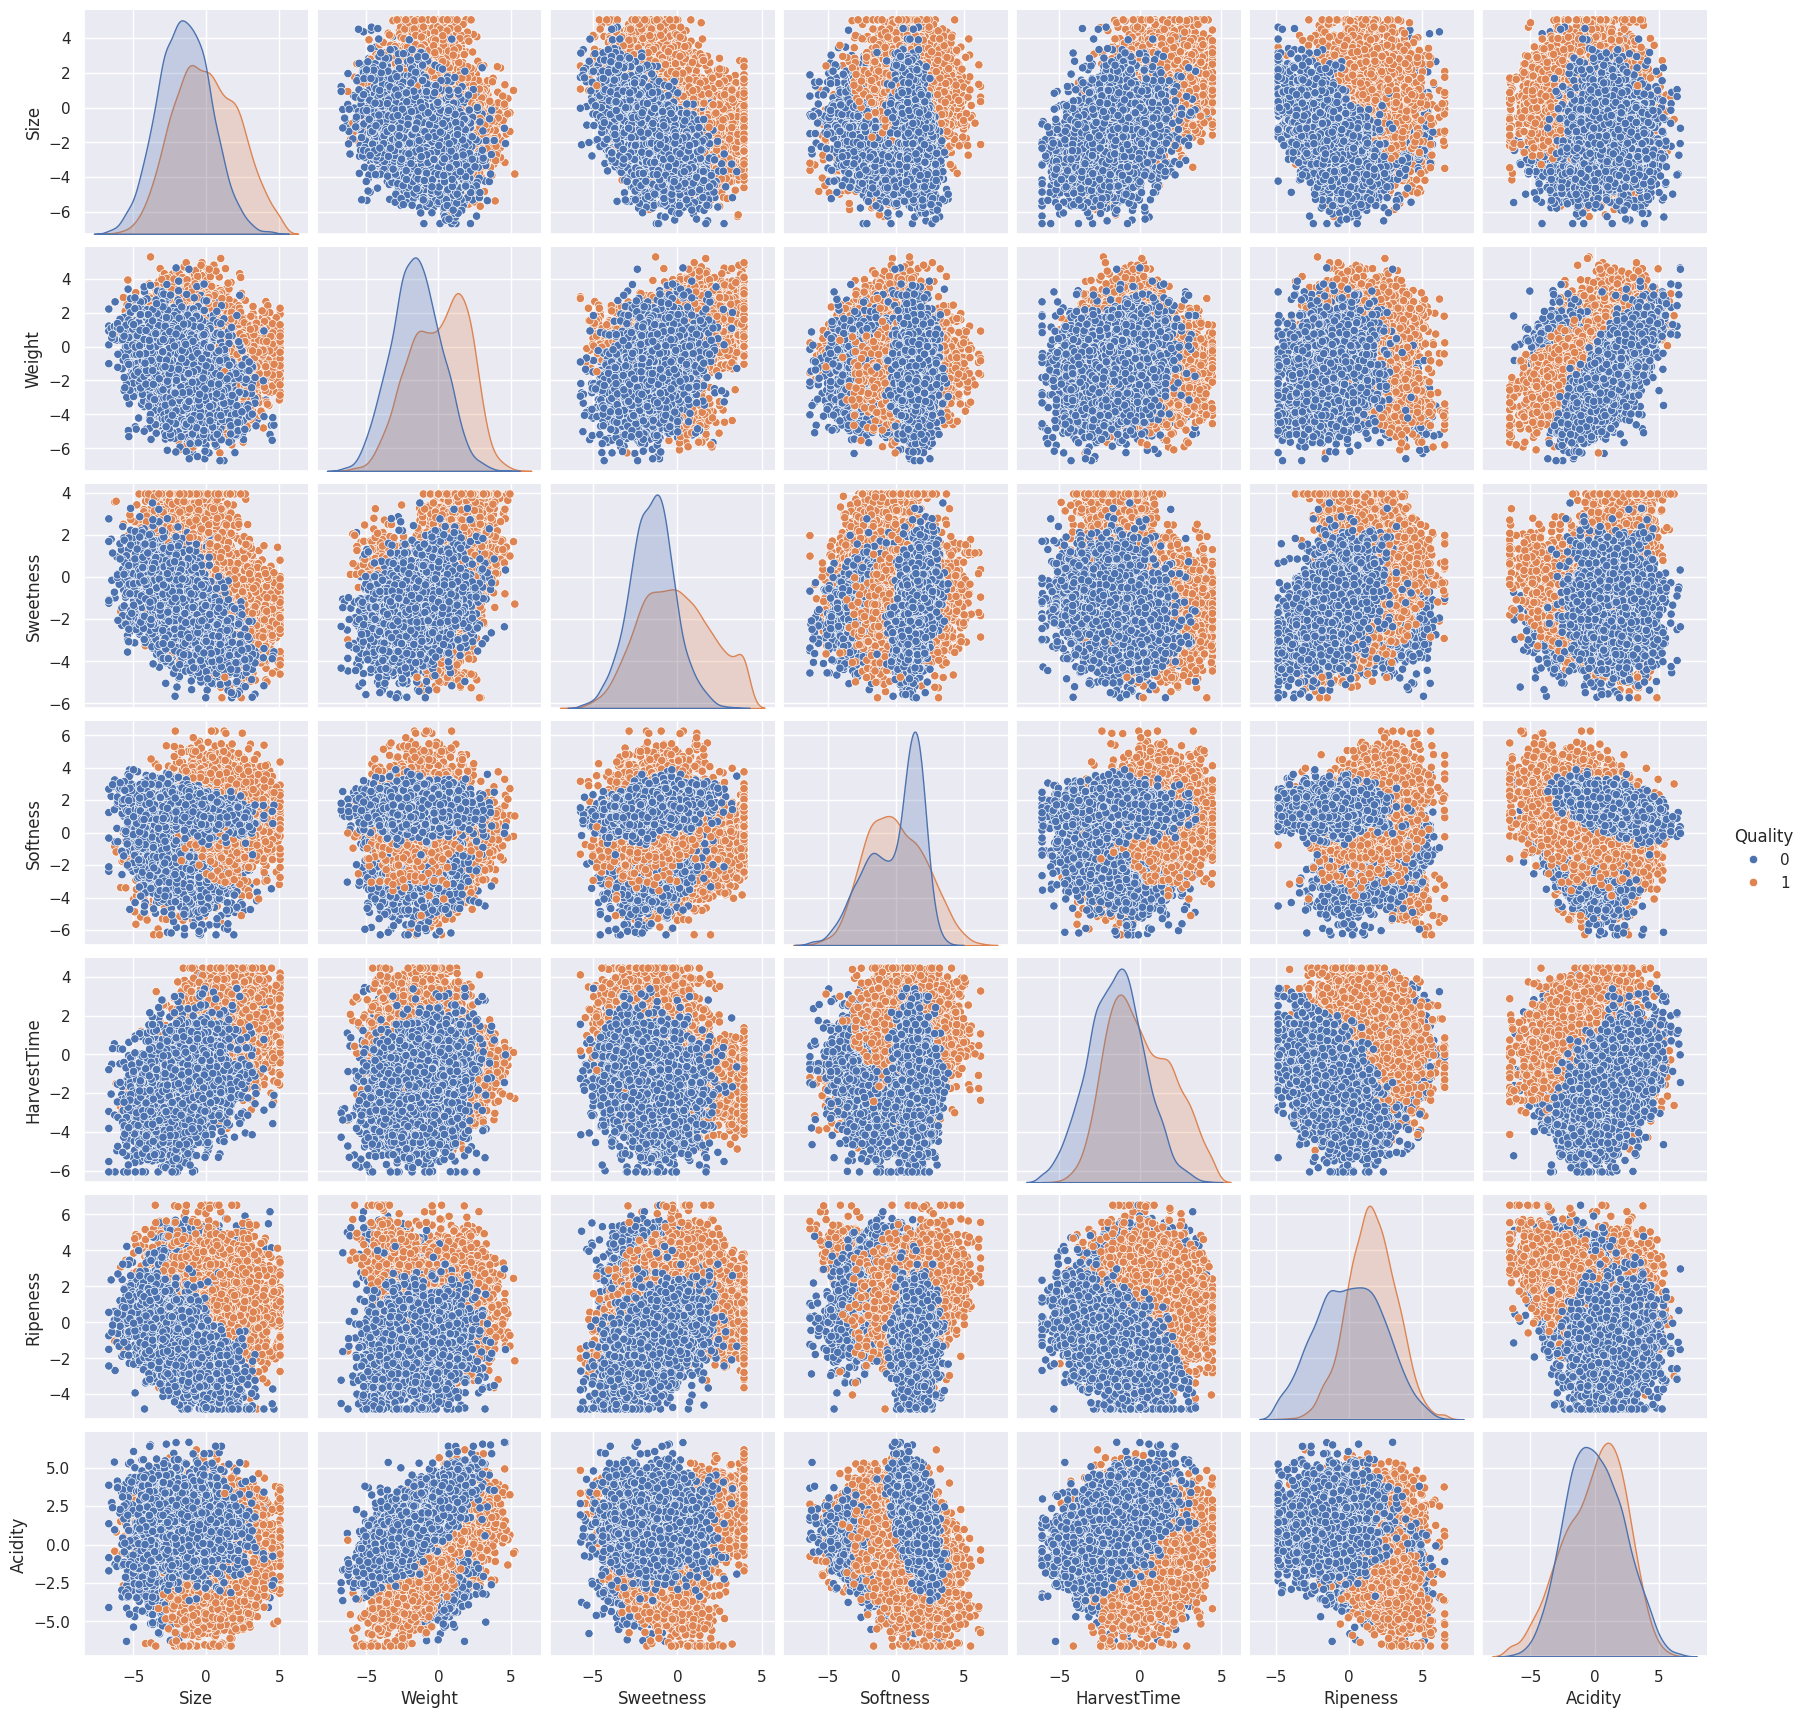

In [20]:
# Visualisasi. warna dibedakan berdasarkan quality apakah baik atau buruk
sns.pairplot(data, vars=['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity'], hue='Quality')

Visualisasi pairplot memberikan wawasan yang mendalam mengenai hubungan antara karakteristik buah dan kualitasnya. Melalui penggunaan variabel seperti 'Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', dan 'Acidity', serta pemisahan warna berdasarkan 'Quality',dapat di identifikasi pola yang membedakan buah berkualitas baik dan buruk.

In [21]:
import seaborn as sns
import pandas as pd

# Menghitung korelasi antara setiap variabel dengan 'Quality'
correlation_with_quality = data.corr()['Quality'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Quality'
print(correlation_with_quality)

Quality        1.000000
Weight         0.388827
Sweetness      0.377771
HarvestTime    0.376749
Size           0.353075
Ripeness       0.350568
Acidity       -0.000190
Softness      -0.001861
Name: Quality, dtype: float64


Berdasarkan output, nilai korelasi antara variabel 'Quality' dengan setiap variabel lain dalam data set menunjukkan bahwa:

*   'Weight', 'Sweetness', 'HarvestTime', 'Size', dan 'Ripeness' memiliki nilai korelasi diantara rentang 0.20-0.399 dengan 'Quality'. Ini menunjukkan bahwa hubungan positif yang lemah antara kelima variabel tersebut dan kemungkinan pisang tersebut berkualitas baik (Quality=1).
*   'Acidity' dan 'Softness' memiliki i nilai korelasi yang cukup rendah dengan 'Quality' (kurang dari 0.1), yang menunjukkan hubungan yang lemah dengan kemungkinan kualitas pisang buruk (Quality=0).

**Memisahkan Variabel X dan Y**

In [22]:
#memisahkan data menjadi variabel x dan y
x=data.drop(['Quality'], axis=1)
y=data['Quality']

**Membagi Data Menjadi Data Training dan Testing**

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print (x_train)
len (x_train)
len (x)
print (y_train)
len (y_train)
len (y)

          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity
1001 -3.170469  1.380627   1.592998 -1.968217    -2.135724  1.612184 -0.459403
7360  1.556792  0.178777  -2.363633  0.021664     0.796370 -1.741904  3.576785
5234  0.857323 -0.353213  -4.089369 -1.503526     0.266287 -0.627169 -0.520382
7390 -1.937611 -1.127723  -1.039918  1.883490    -1.173029  0.714692  1.074610
6841 -2.736523  3.051409  -0.481451  0.177384     0.531025  0.650194  6.529665
...        ...       ...        ...       ...          ...       ...       ...
4931  3.075409 -1.999176  -0.750709  1.784403    -0.258202  2.490204 -1.379668
3264 -1.375787 -2.639473  -3.620193 -4.049357     0.834422  2.504385 -0.797264
1653 -3.067086  1.508407   0.088595 -2.046652    -3.139136  2.847382  1.670501
2607 -1.004978 -1.441338  -5.350899 -1.938014     0.579038  4.055830 -3.936301
2732 -3.821847 -0.870083  -0.540664 -1.429609    -2.978642  0.111439 -0.905134

[6400 rows x 7 columns]
1001    1
7360    0
5234   

8000

**Scaling Data**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)
print("------------------------------------------------------------------------") # Corrected line
print(x_test)

[[-1.13811845  1.05718406  1.24076772 ... -0.70478089  0.39706692
  -0.20541174]
 [ 1.07706223  0.46173451 -0.8306648  ...  0.77068226 -1.19612265
   1.54984706]
 [ 0.74929322  0.19816338 -1.73414689 ...  0.50393811 -0.6666243
  -0.23193031]
 ...
 [-1.08967371  1.12049192  0.45316116 ... -1.20970934  0.98378507
   0.72084164]
 [-0.12337577 -0.34094129 -2.39460112 ...  0.6613179   1.55779742
  -1.71744575]
 [-1.44335247 -0.0579167   0.12372217 ... -1.12894678 -0.31578611
  -0.39925135]]
------------------------------------------------------------------------
[[ 0.39138355 -0.36809119 -1.59005886 ... -0.19421607  0.71453382
  -0.40144905]
 [-0.88936299  0.92280943  0.82342662 ... -0.32782376 -0.08967308
   1.61165081]
 [-0.98828181 -0.07669701  0.38658478 ...  0.05346089 -0.48584722
   0.82436245]
 ...
 [-0.01523372 -0.1804654  -1.42255181 ...  2.66880709 -0.45145848
   0.93180619]
 [-0.4068746   1.73757423  2.51976012 ... -0.64656254 -0.16954083
   0.69670137]
 [ 0.52002748 -1.05653956 

## **Naive Bayes**

1. Inisialisasi Model Naive Bayes


In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

2. Latih Model

In [26]:
# Fit train set Gaussian Naive Bayes
nb.fit(x_train, y_train)

GaussianNB()

3. Menghitung Akurasi Data Latih

In [27]:
# Compute the accuracy of train set
nb.score(x_train, y_train)

0.884375

Untuk mengevaluasi kinerja model terhadap data latih, dilakukan perhitungan akurasi menggunakan metode `score()` dari objek model Naive Bayes. Hasil yang diperoleh menunjukkan nilai akurasi sebesar 0,884375, atau sekitar 88,44%. Nilai ini mengindikasikan bahwa model mampu mempelajari data latih dengan cukup baik, karena sebagian besar prediksi yang dihasilkan sesuai dengan label sebenarnya. Akurasi ini juga menjadi indikator awal bahwa model memiliki potensi yang baik untuk melakukan klasifikasi, meskipun perlu dikaji lebih lanjut terhadap data uji untuk memastikan bahwa model tidak mengalami overfitting.

  4. Prediksi

In [28]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(x_test)

5. Evaluasi dan Validasi

In [29]:
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.8931


Nilai akurasi 0,8931=89,31% menunjukkan bahwa model Naive Bayes sangat baik dalam mengkalsifikasikan data uji. Nilai ini sangat tinggi, menandakan bahwa KNN memang cocok untuk dataset kualitas buah pisang.

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict['NB'])
print(cm)

[[704 102]
 [ 69 725]]


Ini artinya:

True Positif (TP): 725 — Prediksi good, benar-benar good

True Negatif (TN): 778 — Prediksi bad, benar-benar bad

False Positif (FP): 102 — Prediksi good, ternyata bad

False Negatif (FN): 69 — Prediksi bad, ternyata good

In [31]:
from sklearn.metrics import classification_report
clas = classification_report(y_test,y_predict['NB'])
print(clas)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       806
           1       0.88      0.91      0.89       794

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



Dari hasil classification report, kita bisa lihat:

* Precision untuk kelas 0 (bad) adalah 0.91, untuk kelas 1 (good) adalah 0.88.
* Recall untuk kelas 0 adalah 0.87, dan untuk kelas 1 adalah 0.91.
* F1-Score untuk kedua kelas adalah 0.89, menunjukkan keseimbangan antara precision dan recall.
* Akurasi keseluruhan: 89%.

**Visualisasi Naive Bayes**

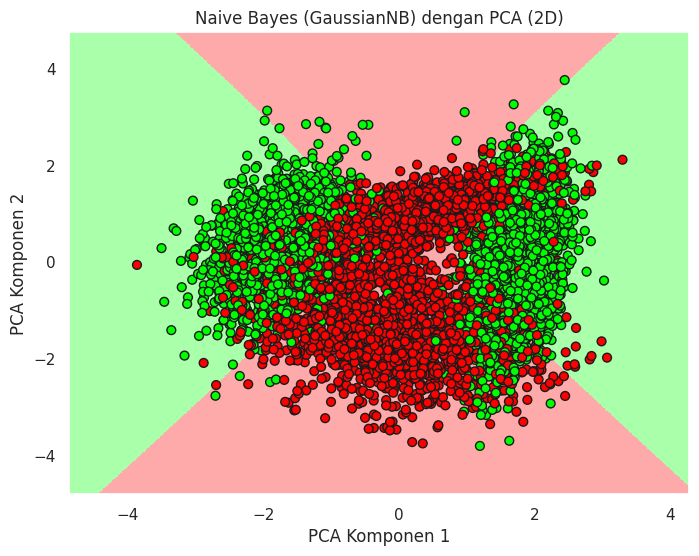

In [32]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Reduksi dimensi menjadi 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Latih ulang Naive Bayes pada data PCA
nb_pca = GaussianNB()
nb_pca.fit(x_train_pca, y_train)

# Buat decision boundary
h = .02
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = nb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=40)
plt.title("Naive Bayes (GaussianNB) dengan PCA (2D)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.show()


## **KNN (K-Nearest Neighbors)**

Dapat dilakukan penentuan K atau jumlah tetangga terbaik sebagai berikut:

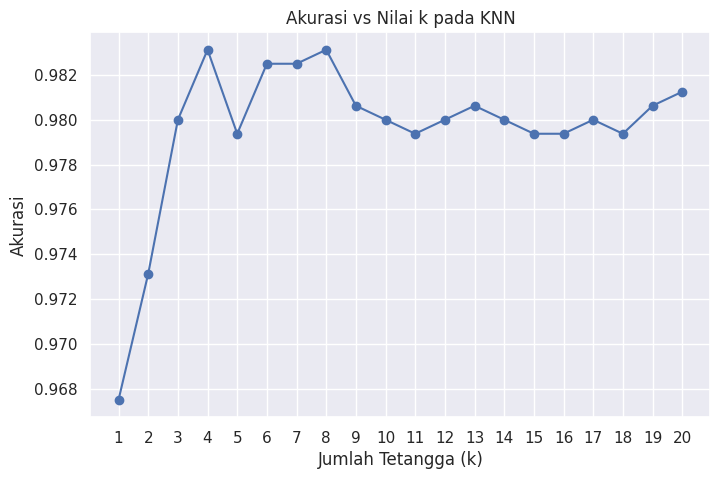

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Akurasi vs Nilai k pada KNN')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Kemudian setelah mengetahui jumlah tetangga terbaik, lanjut ke langkah berikutnya sebagai berikut:

1. Inisialisasi Model KNN (K-Nearest Neighbors)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)

2. Latih Model

In [35]:
# Fit train set KNN (K-Nearest Neighbors
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

3. Prediksi

In [36]:
classif_name = ['KNN']
y_predict = {}
y_predict['KNN'] = knn.predict(x_test)

4. Evaluasi dan Validasi

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict['KNN'])
print('KNN accuracy :', (accuracy))

KNN accuracy : 0.983125


Nilai akurasi 0,983125 = 98,3125% menunjukkan bahwa model KKN sangat baik dalam mengkalsifikasikan data uji. Nilai ini sangat tinggi, menandakan bahwa KNN memang cocok untuk dataset kualitas buah pisang.

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict['KNN'])
print(cm)

[[795  11]
 [ 16 778]]


Ini artinya:

True Positif (TP): 795 — Prediksi good, benar-benar good

True Negatif (TN): 778 — Prediksi bad, benar-benar bad

False Positif (FP): 11 — Prediksi good, ternyata bad

False Negatif (FN): 16 — Prediksi bad, ternyata good

In [39]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test,y_predict['KNN'])
print(clas)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       806
           1       0.88      0.91      0.89       794

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



Dari hasil classification report, kita bisa lihat:

* Precision untuk kelas 0 (bad) adalah 0.91, untuk kelas 1 (good) adalah 0.88.
* Recall untuk kelas 0 adalah 0.87, dan untuk kelas 1 adalah 0.91.
* F1-Score untuk kedua kelas adalah 0.89, menunjukkan keseimbangan antara precision dan recall.
* Akurasi keseluruhan: 89%.

**Visualisasi KKN (K-Nearest Neighbors)**

Visualisasi menggunakan PCA

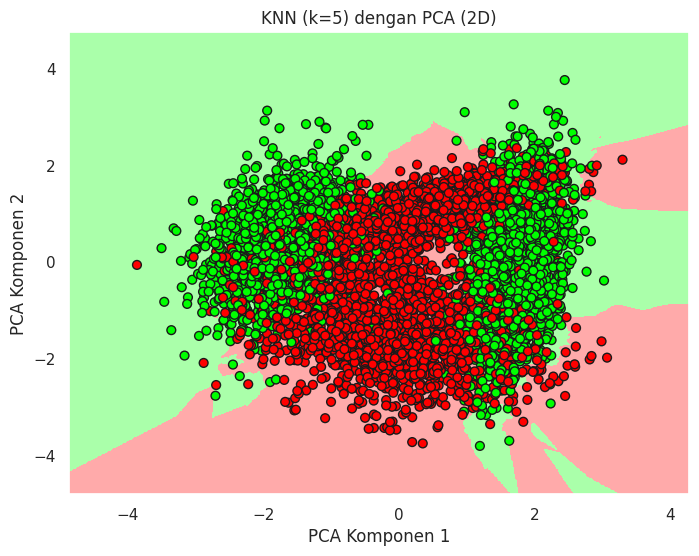

In [40]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Reduksi fitur jadi 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Latih ulang KNN di data PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train)

# Buat decision boundary
h = .02
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisasi
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=40)
plt.title("KNN (k=5) dengan PCA (2D)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.show()


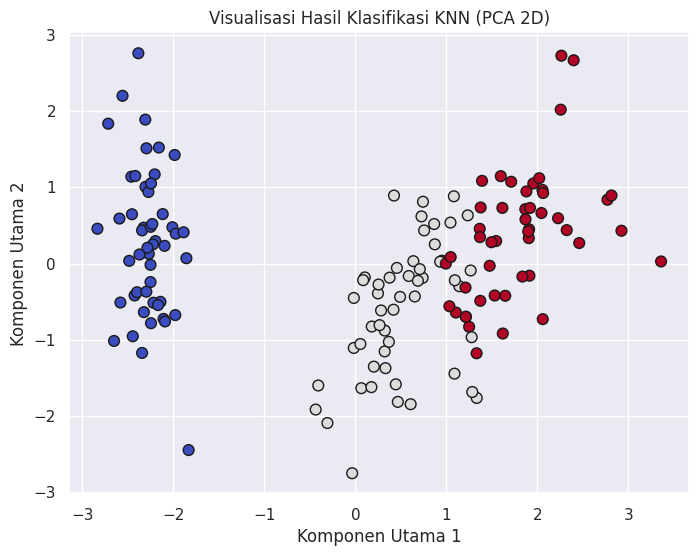

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 1. Load data (pakai Iris sebagai contoh)
data = load_iris()
X = data.data
y = data.target

# 2. Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# 5. Gabungkan data untuk PCA
import numpy as np
X_all_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_all_pred = np.concatenate((knn.predict(X_train_scaled), y_pred))

# 6. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)

# 7. Visualisasi hasil prediksi
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_all_pred, cmap='coolwarm', edgecolor='k', s=60)
plt.title('Visualisasi Hasil Klasifikasi KNN (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True)
plt.show()


**Perbandingan Hasil Klasifikasi antara Naïve Bayes dan KNN**

Berdasarkan hasil dari akurasi Naive Bayes yakni sebesar 0,8931=89,31%. Sedangkan hasil dari akurasi KNN yakni sebesar 0,983125 = 98,3125%.Ini menunjukkan bahwa akurasi dari KNN (K-Nearest Neighbors) lebih tinggi daripada Naive Bayes.